## Plotting of profile results

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import numpy as np
import pandas as pd
import math
import scipy
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import gridspec

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..',  '..'))

# teslakit
from teslakit.database import Database, hyswan_db

# interactive widgets
from ipywidgets import interact, interact_manual, interactive, HBox, Layout, VBox
from ipywidgets import widgets
from natsort import natsorted, ns
from moviepy.editor import *
from IPython.display import display, Image, Video

sys.path.insert(0, op.join(os.getcwd(),'..'))

# bluemath swash module (bluemath.DD.swash

path_swash='/media/administrador/HD/Dropbox/Guam/wrapswash-1d'
sys.path.append(path_swash)
from lib.wrap import SwashProject, SwashWrap
from lib.plots import SwashPlot
from lib.io import SwashIO
from  lib.MDA import *
from lib.RBF import *


In [2]:
def Plot_profile(profile):
    colors=['royalblue','crimson','gold','darkmagenta','darkgreen','darkorange','mediumpurple','coral','pink','lightgreen','darkgreen','darkorange']
    fig=plt.figure(figsize=[17,4])
    gs1=gridspec.GridSpec(1,1)
    ax=fig.add_subplot(gs1[0])

    ax.plot(profile.Distance_profile, -profile.Elevation,linewidth=3,color=colors[prf],alpha=0.7,label='Profile: ' + str(prf))
    s=np.where(profile.Elevation<0)[0][0]
    ax.plot(profile.Distance_profile[s],-profile.Elevation[s],'s',color=colors[prf],markersize=10)
    ax.plot([0,1500],[0,0],':',color='plum',alpha=0.7)
    
    ax.set_xlabel(r'Distance (m)', fontsize=14)
    ax.set_ylabel(r'Elevation (m)', fontsize=14)
    ax.legend()
    ax.set_xlim([0,np.nanmax(profile.Distance_profile)])
    ax.set_ylim(-profile.Elevation[0], -np.nanmin(profile.Elevation)+3)
    
def get_bearing(lat1,lon1,lat2,lon2):
    dLon = np.deg2rad(lon2) - np.deg2rad(lon1);
    y = math.sin(dLon) * math.cos(np.deg2rad(lat2));
    x = math.cos(np.deg2rad(lat1))*math.sin(np.deg2rad(lat2)) - math.sin(np.deg2rad(lat1))*math.cos(np.deg2rad(lat2))*math.cos(dLon);
    brng = np.rad2deg(math.atan2(y, x));
    if brng < 0: brng+= 360
    return brng

In [3]:
# --------------------------------------
# Teslakit database

p_data = r'/media/administrador/HD/Dropbox/Guam/teslakit/data'
# p_data=r'/Users/laurac/Dropbox/Guam/teslakit/data'
db = Database(p_data)

# set site
db.SetSite('GUAM')

#Define profile to run
prf=10
simu=0
do_extract=0
tp_lim=3

# sl=0 #Sea level

In [4]:
p_out = os.path.join(p_data, 'sites', 'GUAM','HYSWASH')
p_waves = op.join(p_out, 'waves_prf'+str(prf)+'.pkl')
ds_output = op.join(p_out, 'reconstruction_prf'+ str (prf) + '_sim_'+str(simu)+'.nc')

In [5]:
# Create the project directory 
p_proj = op.join(p_out, 'projects')     # swash projects main directory
n_proj = 'Guam_prf_{0}'.format(prf)      # project name

sp = SwashProject(p_proj, n_proj)
sw = SwashWrap(sp)
si = SwashIO(sp)
sm = SwashPlot(sp)

### Set profile and load data

In [6]:
def Plot_profile(profile):
    colors=['royalblue','crimson','gold','darkmagenta','darkgreen','darkorange','mediumpurple','coral','pink','lightgreen','darkgreen','darkorange']
    fig=plt.figure(figsize=[17,4])
    gs1=gridspec.GridSpec(1,1)
    ax=fig.add_subplot(gs1[0])

    ax.plot(profile.Distance_profile, -profile.Elevation,linewidth=3,color=colors[prf],alpha=0.7,label='Profile: ' + str(prf))
    s=np.where(profile.Elevation<0)[0][0]
    ax.plot(profile.Distance_profile[s],-profile.Elevation[s],'s',color=colors[prf],markersize=10)
    ax.plot([0,1500],[0,0],':',color='plum',alpha=0.7)
    
    ax.set_xlabel(r'Distance (m)', fontsize=14)
    ax.set_ylabel(r'Elevation (m)', fontsize=14)
    ax.legend()
    ax.set_xlim([0,np.nanmax(profile.Distance_profile)])
    ax.set_ylim(-profile.Elevation[0], -np.nanmin(profile.Elevation)+3)
    
def get_bearing(lat1,lon1,lat2,lon2):
    dLon = np.deg2rad(lon2) - np.deg2rad(lon1);
    y = math.sin(dLon) * math.cos(np.deg2rad(lat2));
    x = math.cos(np.deg2rad(lat1))*math.sin(np.deg2rad(lat2)) - math.sin(np.deg2rad(lat1))*math.cos(np.deg2rad(lat2))*math.cos(dLon);
    brng = np.rad2deg(math.atan2(y, x));
    if brng < 0: brng+= 360
    return brng

<xarray.Dataset>
Dimensions:             (number_points: 322)
Coordinates:
    profile             int64 ...
  * number_points       (number_points) int64 0 1 2 3 4 ... 317 318 319 320 321
Data variables:
    Lon                 (number_points) float64 ...
    Lat                 (number_points) float64 ...
    Elevation           (number_points) float64 ...
    Distance_profile    (number_points) float64 ...
    Rep_coast_distance  int64 ...
    Orientation         float64 ...


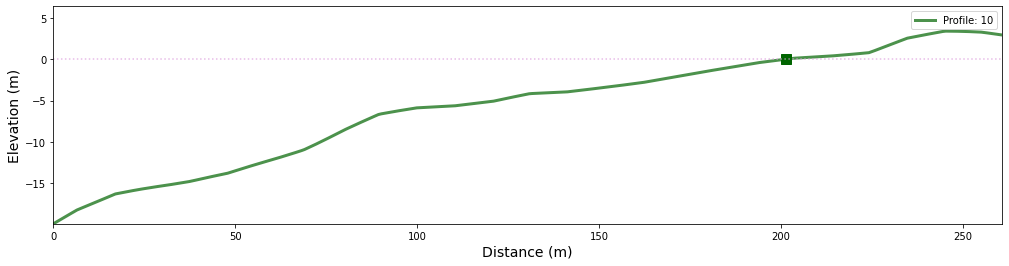

In [7]:
%matplotlib inline
profile=xr.open_dataset(os.path.join(p_out,'Prf_'+str(prf)+'.nc'))
print(profile)
Plot_profile(profile)

### **2.4. Data Postprocessing**

<span style="font-family: times, Times New Roman; font-size:12pt; color:black;"> 
    Different output quantities will be given here to go over the different wave transformation processes including wave propagation, dispersion, flooding and drying, moving shoreline, surf-beat, infragravity waves, set-up induced by wave breaking, run-up and overtopping discharge. <br><br>

<span style="font-family: times, Times New Roman; font-size:12pt; color:black;"> 
    To this end, the time-dependent <span style="font-family: times, Times New Roman; font-weight:bold; font-size:12pt; color:black; background:aliceblue"> surface elevation </span> is stored at every grid point for every time step. After removing the warmup time from the sea surface series, a FFt is applied to obtain its representation in the frequency domain. A further classification is given by spliting the wave frequency into incident waves IC (0.04 - 1), infragravity waves IG (0.004 - 0.04) and very low frequency VLF (0.001 - 0.004). </span><br><br>

    
<span style="font-family: times, Times New Roman; font-size:12pt; color:black;"> 
    The <span style="font-family: times, Times New Roman; font-size:12pt; color:black;font-weight:bold; background:aliceblue">run-up heigh </span> is computed by the intersection between free surface and bottom level considering a minimun  depth of 1cm after each time step. </span><br><br>

<span style="font-family: times, Times New Roman; font-size:12pt; color:black;"> 
    The <span style="font-family: times, Times New Roman; font-size:12pt; color:black;font-weight:bold; background:aliceblue"> mean wave overtopping discharge </span> q (ms/l) is outputted at the highest elevation point.
</span> <br><br>

In [8]:
waves=pd.read_pickle(p_waves)
waves

,forcing,WL,H,T,Wx,Wdir,gamma,warmup,Gate_Q,step,dx
0,Jonswap,0.54352,9.04912,11.6539,7.26137,180,10,540,245.31,0.0227584,1.20905
1,Jonswap,2.18656,0.731075,20.2397,22.0752,0,10,540,245.31,0.0384063,2.11129
2,Jonswap,-0.814305,0.226622,3,1.62794,0,10,540,245.31,0.00773911,0.288747
3,Jonswap,2.9877,3.18002,3.35155,6.61605,180,10,540,245.31,0.00852912,0.32758
4,Jonswap,0.247637,2.4281,18.911,18.73,180,10,540,245.31,0.0359056,1.96901
...,...,...,...,...,...,...,...,...,...,...,...
1495,Jonswap,1.87606,1.8544,7.76427,10.3692,0,10,540,245.31,0.0160726,0.799992
1496,Jonswap,1.98582,2.23655,9.16679,4.3957,180,10,540,245.31,0.0184234,0.947793
1497,Jonswap,0.637797,2.66148,13.6971,5.39153,0,10,540,245.31,0.0264728,1.42655
1498,Jonswap,1.30516,0.150572,10.2563,4.69507,180,10,540,245.31,0.0203009,1.06233


In [9]:
# SUBSET: Load target data

subset =pd.read_pickle(op.join(p_out, 'subset_prf'+str(prf)+'.pkl'))
df_subset = pd.DataFrame({'hs':subset.hs, 'tp':subset.tp, 'Wx':subset.wx, 'wl':subset.level})
print(df_subset)


            hs         tp         Wx        wl
0     9.049117  11.653913  -7.261369  0.543520
1     0.731075  20.239721  22.075204  2.186556
2     0.226622   3.000000   1.627937 -0.814305
3     3.180018   3.351552  -6.616050  2.987696
4     2.428096  18.910967 -18.730043  0.247637
...        ...        ...        ...       ...
1495  1.854402   7.764266  10.369180  1.876057
1496  2.236547   9.166793  -4.395704  1.985822
1497  2.661483  13.697133   5.391535  0.637797
1498  0.150572  10.256335  -4.695071  1.305164
1499  1.036226  19.745369   6.489354  1.874485

[1500 rows x 4 columns]


In [10]:
# df_subset.iloc[[20,50,1132]] #Dan error

In [11]:
sp.depth=profile.Elevation.values
sp.dxinp = np.abs(profile.Distance_profile.values[0]- profile.Distance_profile.values[1])                   
sp.tendc = 3600 

In [12]:
# p_file=r'/media/administrador/HD/Dropbox/Guam/teslakit/data/sites/GUAM/HYSWASH/projects/Guam_prf_10/0003/output.tab'
# f = open(p_file,"r")
# p=np.loadtxt(p_file, skiprows=8)

In [13]:
# TARGET: Extract output from files

if do_extract==1:
    target = sw.metaoutput(waves)
    target = target.rename({'dim_0': 'case'})
    print(target)
    target.to_netcdf(op.join(p_out, 'xds_out_prf'+str(prf)+'.nc'))
else:
    target = xr.open_dataset(op.join(p_out, 'xds_out_prf'+str(prf)+'.nc'))
df_target = pd.DataFrame({'ru2':target.Ru2.values, 'q': target.q.values}) 
print(df_target)

           ru2           q
0     2.874332  182.378554
1     3.416324    0.000000
2     0.010104    0.000000
3     3.416324    0.000000
4     3.416324    0.000000
...        ...         ...
1495  1.374540    0.407395
1496  1.432000    3.989434
1497  2.011800    0.000000
1498  0.321000    0.000000
1499  1.505906    1.522949

[1500 rows x 2 columns]


## **3. Time series reconstruction RBF**

<span style="font-family: times, Times New Roman; font-size:12pt; color:black; text-align: justify">
The reconstruction of the time series of wave parameters in the position of the buoy is carried out by an interpolation technique based on radial basis functions (RBF), a scheme wich is very convenient for scatter and multivariate data. The RBF approximation has been applied successfully in many fields, usually with better results than other interpolation methods (Hardy, 1990).<br><br>
    
Suppose that $f=f(x)$ is the real-valued function that we want to approximate. We are given M scattered data points $\{x_1,..., x_M\}$ of dimension $\textit{n}$ and the associated real function values $\{f_1, ..., f_M\}$, being $f_i = f(x_j), j = 1,...,M$. The RBF interpolation method consists of a weighted sum of radially symmetric basic functions located at the data points. The approximation function is assumed to be of the form:

$RBF(x) = p(x) + \sum\limits_{j=1}^M a_j\Phi{\large (}{\large \parallel}{x - x_j}{\large \parallel}{\large )}$&nbsp;&nbsp;&nbsp;&nbsp;</span>

### Load waves

In [14]:
SIM=pd.read_pickle(os.path.join(db.paths.site.SIMULATION.nearshore,'Simulations_profile_'+str(prf)))
#We selecet a simulation
SIM=SIM.loc[np.where(SIM.n_sim==simu)[0],:].reset_index()
#Same Tp limit used for simulations
SIM['Tp'][np.where(SIM['Tp']<=tp_lim)[0]]=tp_lim

SIM = pd.DataFrame(
    {
        'time': SIM.time.values,
        'n_sim':SIM.n_sim,
        'hs': SIM.Hs.values, 
        'tp': SIM.Tp.values, 
        'dir': SIM.Dir.values,
        'w':SIM.wind_speed.values,
        'wdir': SIM.wind_dir.values,
        'sl':SIM.level.values
       
    }
)

# Proyect wind direction over bathymetry orientation
SIM = proy_wind(profile.Orientation.values, SIM)
SIM

,time,n_sim,hs,tp,dir,w,wdir,sl,wx
0,262968,0,2.008930,7.310433,7.310433,10.411382,69.916573,-0.197515,2.425334
1,262969,0,2.023274,7.310433,7.310433,10.411382,69.916573,-0.158739,2.425334
2,262970,0,2.037618,7.310433,7.310433,10.411382,69.916573,-0.088466,2.425334
3,262971,0,2.051962,7.310433,7.310433,10.411382,69.916573,-0.000945,2.425334
4,262972,0,2.066306,7.310433,7.310433,10.411382,69.916573,0.081685,2.425334
...,...,...,...,...,...,...,...,...,...
8765828,9028796,0,1.570412,10.001550,10.001550,10.709059,65.275108,-0.409317,3.329236
8765829,9028797,0,1.570412,10.001550,10.001550,10.709059,65.275108,-0.239579,3.329236
8765830,9028798,0,1.570412,10.001550,10.001550,10.709059,65.275108,-0.075768,3.329236
8765831,9028799,0,1.570412,10.001550,10.001550,10.709059,65.275108,0.046783,3.329236


In [15]:
# Waves-dataset to reconstruct

df_dataset = pd.DataFrame({'hs':SIM['hs'], 'tp':SIM['tp'], 'wx':SIM['wx'], 'msl':SIM['sl']})
df_dataset

,hs,tp,wx,msl
0,2.008930,7.310433,2.425334,-0.197515
1,2.023274,7.310433,2.425334,-0.158739
2,2.037618,7.310433,2.425334,-0.088466
3,2.051962,7.310433,2.425334,-0.000945
4,2.066306,7.310433,2.425334,0.081685
...,...,...,...,...
8765828,1.570412,10.001550,3.329236,-0.409317
8765829,1.570412,10.001550,3.329236,-0.239579
8765830,1.570412,10.001550,3.329236,-0.075768
8765831,1.570412,10.001550,3.329236,0.046783


In [16]:
# subset - target : scalar - directional index
ix_scalar_subset = [0, 1, 2, 3]    #  scalar (hs, tp, wx, nmm)
ix_directional_subset = []          #  directional ()
    
ix_scalar_target = [0, 1]            #  scalar (ru2, q)
ix_directional_target = []          #  directional ()

# df_subset = pd.DataFrame({'hs':waves['H'], 'tp':waves['T'], 'Wx':waves['Wx'], 'wl':waves['WL']})
# df_dataset = pd.DataFrame({'hs':dataset_2rec['hs'], 'tp':dataset_2rec['tp'], 'wx':dataset_2rec['wx'], 'msl':dataset_2rec['sl']})
# df_target = pd.DataFrame({'ru2':xds_out['Ru2'].values, 'q': xds_out['q'].values}) 

# get nan positions from original dataframe
dr_data, dr_subset, dr_target, inds_dataset = fit_nonvalues(df_dataset, df_subset, df_target)

In [17]:
# Box-Cox transform
dr_target, lmbda = box_cox(dr_target)

print('Lambda= ' + str(lmbda))

Lambda= 0.09228156213012928


In [ ]:
# RBF - Reconstruction
out  = RBF_Reconstruction(
       dr_subset.values, ix_scalar_subset, ix_directional_subset,
       dr_target, ix_scalar_target, ix_directional_target,
       dr_data.values)
    
# Inverse transformation
out_q = scipy.special.inv_boxcox(out[:,1], lmbda)
out[:,1] = out_q

In [ ]:
# Store RBFs dataset interpolation
output = sea_nonvalues(out, df_dataset, df_target, SIM, inds_dataset, profile=prf)
output.to_netcdf(ds_output)
output

In [ ]:
def plot_RBF_reconstruction(df_dataset, output, figsize):
    
    fig, axs = plt.subplots(6, figsize=figsize, sharex=True)

    axs[0].set_title('', fontweight='bold')
    axs[0].plot(df_dataset.index, df_dataset.hs, c='b')
    axs[0].set_ylabel('Hs (m)')
    
    axs[1].plot(df_dataset.index, df_dataset.tp, c='orangered')
    axs[1].set_ylabel('Tp (s)')
    
    axs[2].plot(df_dataset.index, df_dataset.wx, c='yellowgreen')
    axs[2].set_ylabel('Wx (m/s)')
    
    axs[3].plot(df_dataset.index, df_dataset.msl, c='deepskyblue')
    axs[3].set_ylabel('Msl (m)')
    
    axs[4].plot(output.time, output.ru2, '.', c='k', markersize=2)
    axs[4].set_ylabel('$Ru2%$ $(m)$')
    axs[4].plot([df_dataset.index[0], df_dataset.index[-1]], [0, 0], c='r')
    
    axs[5].plot(output.time, output.q, '.', c='k', markersize=3)
    axs[5].set_ylabel('$q$ $(l/s)$')
    axs[5].set_xlim(df_dataset.index[0], df_dataset.index[-1])
#     axs[5].set_ylim(0, 100)
    axs[5].plot([df_dataset.index[0], df_dataset.index[-1]], [0, 0], c='r')
    
    return(fig)


In [ ]:
%matplotlib
fig = plot_RBF_reconstruction(df_dataset, output, figsize=(20, 10))
#fig.savefig(op.join(p_out, 'reconstruction_prf'+ str (prf) + '_sim_'+str(simu)+'.png'))